<h1 style="background-color:#FF45D7; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Customer Data Base
</h2>

- *carID* - An attribute that contains an identifier for each car;
- *Brand* -  The car’s main brand (e.g. Ford, Toyota);
- *model* -  The car model;
- *year* -  The year of Registration of the Car;
- *mileage* - The total reported distance travelled by the car (inmiles);
- *tax* - The amount of road tax (in £) that, in 2020, wasapplicable to the car in question;
- *fuelType* - Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric);
- *mpg* - Average Miles per Gallon;
- *engineSize* - Size of Engine in liters (Cubic Decimeters);
- *paintQuality%* - The mechanic’s assessment of the cars’ overall paintquality and hull integrity (filled by the mechanicduring evaluation);
- *previousOwners* - Number of previous registered owners of the vehicle.
- *hasDamage* - Boolean marker filled by the seller at the time ofregistration stating whether the car is damaged or not;
- *price* The car’s price when purchased by Cars 4 You (in £);




In [185]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

# path to folder
df_train = pd.read_csv("project_data/train.csv", delimiter=',', header=0, decimal='.', quotechar='"')

In [186]:
#divinding into X and y, as well as validation set and training set
X_test = pd.read_csv("project_data/test.csv", delimiter=',', header=0, decimal='.', quotechar='"')
# setting 'carID' as index
df_train.set_index('carID', inplace = True)
X_test.set_index('carID', inplace = True)


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
1. Data Pre-processing and Cleaning
</h2>

<h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
.shape, .head() and .tail() visualizations
</h3>

In [187]:
df_train.shape, X_test.shape

((75973, 13), (32567, 12))

In [188]:
df_train.head() #Checking the first rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [189]:
X_test.head() #Checking the first rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [190]:
df_train.tail() #Checking the last rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [191]:
X_test.tail() #Checking the last rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
105775,VW,Tiguan,2017.0,Manual,27575.00000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
81363,BMW,X2,2020.0,Automatic,1980.00000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
76833,Audi,Q5,2019.0,Semi-Auto,8297.00000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
91768,Mercedes,A Class,2019.0,Manual,-50755.21023,Petrol,145.0,28.5,1.3,81.0,1.0,0.0
99627,Toyota,Yaris,2017.0,Automatic,11071.00000,Petrol,30.0,58.0,1.3,98.0,4.0,0.0


In [192]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Data types, duplicate/missing/unique values, typecasting, feature stats
</h3>

### **Data Types and Typecasting**

In [193]:
df_train.dtypes #Checking the datatypes of each feature in the dataset df_train

Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

'year' should be a datetime object. 'previousOwnwers' is also portrayed on the wrong data type, as it should be an Integer. The remainder seem to be correctly assigned

In [194]:
#correcting the data types
df_train['year']=pd.to_datetime(X['year'], format='%Y')
X_test['year']=pd.to_datetime(X_test['year'], format='%Y')

#previousOwnwers to integer will be done later on the preprocessing step

### **Missing Values**

In [195]:
df_train.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
df_train.isna().sum() #Checking the number of missing values in each feature of the dataset X

Brand             1521
model             1517
year              2344
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [196]:
X_test.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
X_test.isna().sum() #Checking the number of missing values in each feature of the

Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage          597
dtype: int64

<span style="color:red">The missing values on all features have to be handled!</span>


### **Duplicated Values**

In [197]:
print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 0


The training set has 11 duplicated lines. Its' presence is insignificant, therefore we can drop them.

In [198]:
X = X.drop_duplicates()
print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 0


In [199]:
print("\nDuplicated values:", X_test.duplicated().sum())


Duplicated values: 0


### **Numerical Variables Statistics**

In [200]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
year,73629,2017-02-03 16:59:33.157315840,1970-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2019-01-01 00:00:00,2024-01-01 00:00:00,NaN
price,75973.0,16881.889553,450.0,10200.0,14699.0,20950.0,159999.0,9736.926322
mileage,74510.0,23004.184088,-58540.574478,7423.25,17300.0,32427.5,323000.0,22129.788366
tax,68069.0,120.329078,-91.12163,125.0,145.0,145.0,580.0,65.521176
mpg,68047.0,55.152666,-43.421768,46.3,54.3,62.8,470.8,16.497837
engineSize,74457.0,1.660136,-0.103493,1.2,1.6,2.0,6.6,0.573462
paintQuality%,74449.0,64.590667,1.638913,47.0,65.0,82.0,125.594308,21.021065
previousOwners,74423.0,1.99458,-2.34565,1.0,2.0,3.0,6.258371,1.472981
hasDamage,74425.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Categorical Features Unique Values**

Checking if all the unique values of the categorical features are appropriate.

In [201]:
for var in df_train.columns:
    if df_train[var].dtype == 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

Brand unique values: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot'] 

model unique values: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 '

We observe that there are typos present on all categorical variables. We have to get them fixed in order to understand the data better and clear out inconsistencies.


In [202]:
for var in X_test.columns:
    if X_test[var].dtype == 'object':
        print(f"{var} unique values: {X_test[var].unique()} \n")

Brand unique values: ['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyot' 'Toyota'
 'Audi' nan 'For' 'Ope' 'toyota' 'vw' 'hyundai' 'MW' 'SKODA' 'ord' 'udi'
 'bmw' 'V' 'BM' 'HYUNDAI' 'OPEL' 'mercedes' 'audi' 'Mercede' 'pel' 'opel'
 'FORD' 'yundai' 'ford' 'Aud' 'oyota' 'MERCEDES' 'ercedes' 'AUDI' 'koda'
 'Hyunda' 'W' 'skoda' 'Skod' 'ercede' 'TOYOTA' 'ERCEDES' 'kod' 'ORD' 'v'
 'ud' 'M' 'FOR' 'for' 'MERCEDE' 'YUNDAI' 'PEL' 'ope' 'or' 'TOYOT' 'hyunda'
 'oyot' 'UDI' 'mw' 'pe' 'bm'] 

model unique values: [' I30' ' Tiguan' ' 2 Series' ' Grandland X' '1 Series' ' Fiesta' ' X1'
 ' B Class' ' Focus' ' Superb' ' 5 Series' ' C Class' ' Up' ' Aygo' 'Golf'
 ' M CLAS' ' Land Cruiser' ' TT' ' Adam' ' Zafira' ' E Class' ' Golf'
 ' 3 Series' ' IX20' ' A4' ' Yaris' ' Passat' ' I10' ' Mokka X'
 ' EcoSport' ' 1 Series' ' 4 Series' ' A7' ' Corsa' ' Kuga' ' Grand C-MAX'
 ' Q2' ' M4' ' A Class' ' RAV4' ' Fabia' ' Insignia' ' A1' ' X6' ' Meriva'
 ' Caravelle' ' Octavia' ' Auris' ' X-CLASS' ' FOCUS' '

TypeError: unhashable type: 'Series'

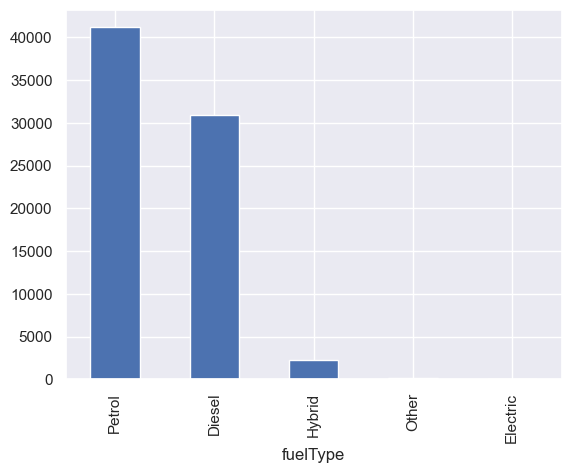

In [203]:
#Typo fixing on 'fuelType' feature
diesel_types=["DIESEL","Diese","diesel","iesel","IESEL","DIESE","iese","diese","IESE"]
petrol_types=["petrol","Petro","etrol", "PETROL","petro","etro","ETROL","PETRO","ETRO"]
hybrid_types=["HYBRID", "hybrid","Hybri","ybrid","HYBRI","ybri","YBRID","hybri"]
other=["ther","Othe","OTHER","other"]
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Diesel" if i in diesel_types else i)
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Petrol" if i in petrol_types else i)
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Hybrid" if i in hybrid_types else i)
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Other" if i in other else i)
df_train["fuelType"].value_counts().plot(kind="bar")


X_test["fuelType"] = X_test["fuelType"].apply(lambda i: "Diesel" if i in diesel_types else i)
X_test["fuelType"] = X_test["fuelType"].apply(lambda i: "Petrol" if i in petrol_types else i)
X_test["fuelType"] = X_test["fuelType"].apply(lambda i: "Hybrid" if i in hybrid_types else i)
X_test["fuelType"] = X_test["fuelType"].apply(lambda i: "Other" if i in other else i)


#Correct "nan" falses
df_train.loc[X["fuelType"].isin(["nan"]), "fuelType"] = np.nan
df_train["fuelType"].value_counts(dropna=False)
df_train["fuelType"].unique()
X_test["fuelType"].unique()



In [ ]:
#Typo fixing on 'Brand' feature
X["Brand"].unique()

bmw_types=["w","MW","bmw","BM","W","mw","M","bm"]
toyota_types=["Toyot","TOYOTA","toyota","OYOTA","TOYOT","toyot","oyota","oyot"]


df_train["Brand"]=df_train["Brand"].apply(lambda i: "BMW" if i in bmw_types else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Toyota" if i in toyota_types else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Skoda" if i in ["KOD","koda","SKOD","KODA","skod","SKODA","Skod","skoda","kod"] else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Audi" if i in ["UD","AUDI","audi","Aud","UDI","AUD","udi","aud","ud"] else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Ford" if i in ["ORD","OR","ord","ford","for","ORD"] else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Mercedes" if i in ["Mercede","MERCEDES","ercedes","MERCEDE","ercede","ERCEDES","mercede","mercedes"] else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Opel" if i in ["Ope","OPE","ope","opel","pel","pe","OPEL","PEL"] else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Ford" if i in ["FOR","For","or","FORD"] else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "Hyundai" if i in ['yunda','yundai','yundai', 'Hyunda', 'hyundai','HYUNDAI', 'yunda', 'HYUNDA', 'hyunda'] else i)
df_train["Brand"]=df_train["Brand"].apply(lambda i: "VW" if i in ['v','V','vw'] else i)

X_test["Brand"] = X_test["Brand"].apply(lambda i: "BMW" if i in bmw_types else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Toyota" if i in toyota_types else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Skoda" if i in ["KOD","koda","SKOD","KODA","skod","SKODA","Skod","skoda","kod"] else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Audi" if i in ["UD","AUDI","audi","Aud","UDI","AUD","udi","aud","ud"] else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Ford" if i in ["ORD","OR","ord","ford","for","ORD"] else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Mercedes" if i in ["Mercede","MERCEDES","ercedes","MERCEDE","ercede","ERCEDES","mercede","mercedes"] else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Opel" if i in ["Ope","OPE","ope","opel","pel","pe","OPEL","PEL"] else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Ford" if i in ["FOR","For","or","FORD"] else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "Hyundai" if i in ['yunda','YUNDAI','yundai','Hyunda','hyundai','HYUNDAI','yunda','HYUNDA','hyunda'] else i)
X_test["Brand"] = X_test["Brand"].apply(lambda i: "VW" if i in ['v','V','vw'] else i)

#Correct "nan" falses
df_train.loc[X["Brand"].isin(["nan","Other"]), "Brand"] = np.nan
X_test.loc[X_test["Brand"].isin(["nan","Other"]), "Brand"] = np.nan

#checking the corrections
df_train["Brand"].value_counts(dropna=False)
df_train["Brand"].unique()
X_test["Brand"].unique()



array(['Hyundai', 'VW', 'BMW', 'Opel', 'Ford', 'Mercedes', 'Skoda',
       'Toyota', 'Audi', nan], dtype=object)

In [ ]:
#typos in model type 

car_models = {
    "GOLF": ['Golf', 'Gol', ' GOLF', ' golf', ' golf s', ' Gol', ' Golf SV', ' golf sv', 'Golf', 'golf', ' GOLF', ' Golf S', ' gol', ' GOL', ' Golf'],
    "POLO": [' POL','Polo', 'Pol', 'polo', ' POLO', ' polo', ' Pol', ' Polo', 'POLO'],
    "PASSAT": ['PASSA','Passat', ' PASSAT', ' Passa', ' passa', ' Passa', ' Passa', ' passat', ' Passat'],
    "TIGUAN": ['Tiguan', ' Tiguan', ' TIGUAN', 'Tigua', ' tiguan', ' Tigua', ' TIGUA', ' tiguan', ' Tiguan', 'TIGUAN', 'tiguan'],
    "TIGUAN_ALLSPACE": [' tiguan allspace', ' Tiguan Allspac', 'Tiguan Allspace', ' TIGUAN ALLSPACE', ' Tiguan Allspace'],
    "TOUAREG": ['Touareg', ' TOUAREG', ' touareg', ' Touare', ' Touareg'],
    "T_ROC": ['T-Roc', ' T-Ro', ' t roc', ' T-Roc'],
    "T_CROSS": ['T-Cross', ' T-CROSS', ' t-cros', ' t cross', ' T-Cros', ' T-RO', ' T-ROC', ' t-roc', ' t-cross', 'T-Cross', ' T-Cross'],
    "ARTEON": ['Arteon', ' arteon', ' Arteo', ' ARTEON', ' Arteon'],
    "SHARAN": [' SHUTTLE','Sharan', ' sharan', ' SHARAN', ' Shara', ' Sharan', ' Sharan'],
    "JETTA": ['jetta','Jetta', ' Jetta', ' JETTA'],
    "CC": ['CC', ' cc', ' CC'],
    "CARAVELLE": ['Caravelle', ' caravelle', ' Caravell', ' Caravelle'],
    "CALIFORNIA": [' Californi','Californi','California', ' California', 'Californi'],
    "CADDY": ['Caddy', ' Caddy'],
    "CADDY_MAXI": ['Caddy Maxi Life', ' Caddy Maxi Lif', ' Caddy Maxi', ' Caddy Maxi Life', ' Caddy Life'],
    "TOURAN": ['Touran', ' touran', ' TOURAN', ' Touran', 'Toura', ' TOURA', ' Toura'],
    "GOLF_SV": ['Golf SV', 'Golf S', ' golf sv', ' GOLF SV', 'Golf SV'],
    "BEETLE": ['Beetle', ' beetle', ' Beetl', ' Beetle'],
    "SCIROCCO": ['Scirocco', ' scirocco', ' Scirocc', ' SCIROCCO', ' Scirocco'],
    "UP": ['Up', ' up', ' UP', ' Up', ' U', 'U', 'UP'],
    "AMAROK": ['Amarok', ' Amarok', ' amarok', ' Amaro'],
    "EOS": ['Eos', ' Eos'],
    "FOX": ['Fox', ' Fox'], "FOCUS": ['Focus', 'FOCUS', ' focus', ' FOCUS', ' FOCU', ' Focu', ' focu', ' Focus', 'Focu', 'focus'],
    "FIESTA": ['Fiesta', ' FIESTA', ' Fiest', 'fiesta', ' fiesta', ' Fiest', ' FIEST', ' fiest', ' Fiesta', 'Fiest'],
    "MONDEO": ['Mondeo', ' MONDEO', ' mondeo', ' Monde', ' MONDE', ' Mondeo'],
    "KUGA": ['Kuga', ' KUGA', ' kuga', ' Kug', ' kuga', ' Kuga', 'kuga'],
    "GALAXY": ['Galaxy', ' GALAXY', ' Galax', ' galax', ' Galaxy', ' galaxy'],
    "S_MAX": ['S-MAX', ' s-max', ' S-MA', ' s-ma', ' S-MAX'],
    "B_MAX": ['B-MAX', ' B-MA', ' b-max', ' B-MA', ' B-MAX', 'B-MA'],
    "ECOSPORT": ['EcoSport', ' ecosport', ' ECOSPORT', ' EcoSpor', ' EcoSport'],
    "PUMA": ['Pum',' Pum','Puma', ' puma', ' PUMA', ' Puma'],
    "TOURNEO_CUSTOM": ['Tourneo Custom', ' tourneo custom', ' Tourneo Custo', ' Tourneo Custom'],
    "TOURNEO_CONNECT": [' Transit Tourneo','Tourneo Connect', ' Grand Tourneo Connect', ' tourneo connect', ' Tourneo Connect'],
    "KA": ['Ka', ' KA', ' ka', ' Ka'],
    "KA_PLUS": [' Ka+', ' ka+', ' KA+', 'Ka+', 'ka+'],
    "C_MAX": ['C-MAX', ' C-MAX', ' c-max', ' C-MA'],
    "GRAND_C_MAX": [' Grand C-MAX', ' GRAND C-MAX', ' Grand C-MA', ' grand c-max'],
    "EDGE": ['Edge', ' edge', ' EDGE', ' Edge', ' Edg'],
    "MUSTANG": ['Mustang', ' mustang', ' Mustang'],
    "GRAND_TOURNEO_CONNECT": [' Grand Tourneo Connec'],
    "FUSION": [' fusion','Fusion', ' Fusion', 'fusion'],
    "STREETKA": ['Streeka', ' Streetka'],
    "RANGER": ['Ranger', ' Ranger'],
    "ESCORT": ['Escort', ' Escort'], "CORSA": ['Corsa', 'corsa', ' corsa', ' Cors', ' CORSA', ' cors', ' CORS', ' Corsa'],
    "ASTRA": ['Astra', 'ASTRA', 'astra', ' astra', ' ASTRA', ' ASTRA', ' Astr', 'Astra', ' Astra'],
    "INSIGNIA": ['Insignia', 'Insigni', ' INSIGNIA', ' insignia', ' Insigni', ' INSIGNI', ' Insignia'],
    "MOKKA": ['Mokka', 'Mokk', ' MOKKA', ' Mokka X', ' mokka', ' mokka x', ' MOKKA X', ' Mokk', ' Mokk', ' Mokka ', ' mokka ', ' Mokka X', ' Mokka', 'Mokka X'],
    "ZAFIRA": [' zafira tourer','ZAFIR','Zafira', ' zafira', ' ZAFIRA', ' Zafir', ' Zafira Tourer', ' Zafira Toure', ' ZAFIRA TOURER', 'Zafira Tourer', ' Zafira', 'Zafir'],
    "VIVA": ['viva','Viva', ' viva', ' VIVA', ' Viva', ' Viv', ' Viva'],
    "MERIVA": ['Meriva', ' meriva', ' MERIVA', ' Meriv', ' Meriva'],
    "ADAM": ['Adam', ' adam', ' Ada', ' ADAM', ' Adam'],
    "COMBO_LIFE": ['Combo Life', 'COMBO LIFE', ' combo life', ' COMBO LIFE', ' Combo Lif', ' Combo Life'],
    "CROSSLAND_X": ['Crossland X', ' CROSSLAND X', ' crossland x', ' Crossland ', ' CrosslandX', ' Crossland X'],
    "GRANDLAND_X": ['Grandland X', ' Grandland X', ' grandland x', ' GRANDLAND X', ' Grandland ', ' grandland ', ' Grandland X'],
    "GTC": ['GTC', ' gtc', ' GTC', 'gtc'],
    "ANTARA": ['Antara', ' Antara'],
    "VIVARO": ['Vivaro', ' Vivaro'],
    "VECTRA": ['VECTRA','Vectra', ' Vectra', ' VECTRA'],
    "AGILA": ['AGILA','Agila', ' Agila'],
    "TIGRA": ['Tigra', ' Tigra'],
    "CASCADA": ['CASCADA','Cascada', ' Cascada'],
    "AMPERA": ['Ampera', ' Ampera'], "SERIES_1": ['1 Series', '1 series', '1 SERIES', ' 1 Series', ' 1 SERIES', ' 1 serie', ' 1 Serie', ' 1 SERIE', ' 1 series'],
    "SERIES_2": ['2 series','2 Series', '2 Serie', ' 2 Series', ' 2 SERIES', ' 2 Serie', ' 2 serie', ' 2 series'],
    "SERIES_3": ['3 Series', '3 Serie', ' 3 Series', ' 3 SERIES', ' 3 Serie', ' 3 serie', ' 3 series'],
    "SERIES_4": ['4 Series', ' 4 serie', '4 series', ' 4 Series', ' 4 SERIES', ' 4 Serie', ' 4 series'],
    "SERIES_5": ['5 SERIE','5 Series', '5 SERIES', ' 5 Series', ' 5 SERIES', ' 5 Serie', ' 5 series'],
    "SERIES_6": ['6 Series', ' 6 Series', ' 6 SERIES', ' 6 Serie', ' 6 series'],
    "SERIES_7": ['7 Series', ' 7 Series', ' 7 SERIES', ' 7 Serie', ' 7 series'],
    "SERIES_8": ['8 Series', ' 8 SERIES', '8 SERIES', ' 8 Serie', ' 8 Series', ' 8 series'],
    "X1": ['X1', ' x1', ' X1', 'x1'],
    "X2": ['X2', ' IX2', ' x2', ' X2'],
    "X3": ['X3', ' x3', ' X3'],
    "X4": ['X4', ' x4', ' X4'],
    "X5": ['X5', ' x5', ' X5'],
    "X6": ['X6', ' x6', ' X6'],
    "X7": ['X7', ' x7', ' X7'],
    "Z3": ['Z3', ' Z3'],
    "Z4": ['Z4', ' z4', ' Z4'],
    "M2": ['M2', ' M2'],
    "M3": ['M3', ' m3', ' M3'],
    "M4": ['M4', ' m4', ' M4'],
    "M5": ['M5', ' M5'],
    "M6": ['M6', ' M6'], "A1": ['A1', ' a1', ' A1'],
    "A2": ['A2', ' A2'],
    "A3": ['A3', ' a3', ' A 3', ' A3', ' a3'],
    "A4": ['A4', ' a4', ' A4', ' a4'],
    "A5": ['a5','A5', ' a5', ' A5'],
    "A6": ['A6', ' A6', ' a6'],
    "A7": ['A7', ' a7', ' A7'],
    "A8": ['A8', ' A8', 'a8'],
    "Q2": ['Q2', ' q2', ' Q2'],
    "Q3": ['Q3', ' q3', ' Q3'],
    "Q5": ['Q5', ' q5', ' Q5', ' q5', 'q5'],
    "Q7": ['Q7', ' q7', ' Q7'],
    "Q8": ['Q8', ' q8', ' Q8'],
    "S3": ['S3', ' s3', ' S3'],
    "S4": ['S4', ' S4'],
    "S5": ['S5', ' S5'],
    "S8": ['S8', ' S8'],
    "RS3": ['RS3', ' RS3'],
    "RS4": ['RS4', ' RS4'],
    "RS5": ['RS5', ' RS5'],
    "RS6": ['RS6', ' RS6'],
    "SQ5": ['SQ5', ' SQ5'],
    "SQ7": ['SQ7', ' SQ7', ' sq7'],
    "TT": ['TT', ' TT', ' tt', ' T'],
    "R8": ['R8', ' r8', ' R8'],  
    "A_CLASS": ['A','A-Class', 'a class', 'A CLASS', ' A-Class', ' a class', ' A CLASS', 'A Clas', ' a clas', 'A-Class', ' A Class', 'A CLASS', 'A Clas', ' a class', ' A Class', 'A CLASS', ' A Clas', ' a class', 'A Class'],
    "B_CLASS": ['B-Class', 'b class', 'B CLASS', ' b class', ' B Clas', ' B Class', ' B CLASS', ' b class', 'B Class'],
    "C_CLASS": ['C-Class', 'C Clas', 'C CLASS', 'c class', ' c class', ' C Class', ' C Clas', ' c clas', ' C Class', 'C CLASS', ' c class', ' C CLAS', ' C CLASS', 'C Class'],
    "E_CLASS": ['E-Class', 'E CLASS', ' E Clas', ' e class', 'E Class', 'E-Class', ' E Class', 'E CLASS', ' e class', ' E Class', 'E CLASS', ' e class', ' E CLASS', 'e class'],
    "S_CLASS": ['S-Class', 'S Class', 'S CLASS', ' s class', ' S Clas', ' S Class', 'S CLASS', ' S CLASS'],
    "CLA_CLASS": [' CLA Clas',' CLA-class','CLA-Class', ' CLA CLASS', 'CLA CLASS', 'CLA Class', ' cla class', ' CLA Class', ' CLA Class'],
    "CLS_CLASS": ['CLS-Class', 'CLS Class', 'CLS CLASS', ' cls class', ' CL Class', ' cl class', ' CL CLASS', ' CL Clas', ' CLS Class', ' CLS CLASS', ' CLS Clas'],
    "GLA_CLASS": ['GLA-Class', ' GLA CLASS', 'GLA CLASS', ' gla class', ' GLA Class', ' GLA Clas', 'GLA Class'],
    "GLB_CLASS": ['GLB-Class', ' glb class', 'GLB Class', ' GLB Class'],
    "GLC_CLASS": ['GLC-Class', 'GLC CLASS', ' glc class', ' GLC Class', ' glc clas', ' GLC Class', ' GLC CLASS', ' GLC Clas', 'GLC Class'],
    "GLE_CLASS": ['GLE-Class', ' GLE CLASS', 'GLE CLASS', 'GLE Class', ' gle class', ' GLE Clas', ' GLE Class', 'GLE CLASS'],
    "GLS_CLASS": ['GLS-Class', 'GLS CLASS', ' GLS Class', ' GLS CLASS', ' GLS Clas', ' gls class'],
    "GL_CLASS": [' GL Clas','GL-Class', 'GL Class', ' GL Class', ' GL CLASS', ' gl class'],
    "G_CLASS": ['G-Class', ' G Class'],
    "V_CLASS": ['V-Class', 'V CLASS', ' v class', ' V Clas', ' V Class', ' V CLASS', 'V Class'],
    "X_CLASS": ['X-CLASS','X-Class', ' x-class', ' x-clas', ' X Clas', ' X-CLASS', ' X-CLAS'],
    "R_CLASS": [' R Class',' R'],
    "SL_CLASS": ['SL-Class', ' SL CLASS', 'SL CLASS', ' sl class', ' SL CLAS', ' SL CLASS', ' SL'],
    "SLK_CLASS": ['SLK-Class', 'SLK', ' slk', ' SLK'],
    "M_CLASS": ['M-Class', ' M CLASS', ' m class', 'M Class', ' M Class', ' M Clas'],
    "CLK": ['CLK', ' CLK'],
    "CL_CLASS": ['CL Class'],
    "CLC_CLASS": ['CLC Class', ' CLC Class'],
    "MERCEDES200": ['200', ' 200'],
    "MERCEDES230": ['230', ' 230'],
    "MERCEDES220": ['220', ' 220'],   "YARIS": ['Yaris', 'yaris', ' yaris', 'Yari', ' YARIS', ' Yari', ' Yaris', ' yari', ' Yari', ' YARI'],
    "AYGO": ['Aygo', ' AYGO', ' aygo', 'aygo', ' Ayg', ' AYG', ' ayg', ' Aygo'],
    "COROLLA": ['Corolla', ' COROLLA', ' corolla', ' Coroll', ' Corolla', 'corolla'],
    "C_HR": ['C-HR', ' c-hr', ' C-HR', ' C-H'],
    "AVENSIS": ['Avensis', ' AVENSIS', ' avensis', ' Avensis'],
    "PRIUS": ['Prius', ' PRIUS', ' prius', ' Prius'],
    "RAV4": ['RAV4', ' RAV', ' rav', ' rav4', ' RAV4', 'rav4', 'RAV'],
    "HILUX": ['HILU','Hilux', ' hilux', ' Hilu', ' Hilux'],
    "VERSO": ['Verso', ' verso', ' VERSO', ' Verso-S', ' Vers', ' Verso'],
    "SUPRA": ['Supra', ' Supra', 'Supra'],
    "LAND_CRUISER": [' land cruiser','Land Cruiser', ' Land Cruise', ' Land Cruiser'],
    "CAMRY": [' Camr','Camry', ' Camry'],
    "PROACE_VERSO": ['Proace Verso', ' PROACE VERSO'],
    "URBAN_CRUISER": ['Urban Cruiser', ' Urban Cruiser', ' Urban Cruise'],
    "AURIS": ['Auris', ' auris', ' AURI', ' AURIS', ' Auri', ' Auris'],
    "GT86": [' GT86', 'GT86', ' gt86'], "I10": ['i10', ' i10', 'I10', ' I1', ' I10', ' I1'],
    "I20": ['i20', 'I20', ' I20', ' i20', ' I2'],
    "I30": ['i30', ' i30', 'I30', ' I30', 'I3', ' i3', 'i3', ' I3'],
    "I40": ['i40', 'I40', ' i40', ' I40', ' I40'],
    "I800": ['i800', ' I80', 'I800', ' i800', ' I800', 'i8', ' I8', ' i8'],
    "IONIQ": ['Ioniq', ' ioniq', ' IONIQ', ' Ioni', ' Ioniq', ' IQ', 'IONIQ'],
    "KONA": ['Kona', ' KONA', ' kona', ' KON', ' Kona', ' Kon'],
    "TUCSON": ['Tucson', 'Tucso', ' tucson', ' Tucso', ' TUCSON', ' TUCSO', ' Tucso', ' TUCSO', ' TUCSON', ' Tucson'],
    "SANTA_FE": ['Santa Fe', ' santa fe', ' Santa Fe', ' SANTA FE', ' Santa F'],
    "GETZ": ['Getz', ' Getz'],
    "IX20": ['ix20', 'IX20', ' IX20', ' ix20'],
    "IX35": ['ix35', ' IX35', 'IX35', ' ix35'],
    "VELOSTER": ['Veloste', ' Veloste'],
    "ACCENT": ['Accent', ' Accent'],
    "TERRACAN": ['Terracan', ' Terracan'],  "FABIA": ['Fabia', ' FABIA', ' fabia', ' Fabi', ' Fabia', 'FABIA'],
    "OCTAVIA": [' octavi',' OCTAVI','Octavia', ' OCTAVIA', ' octavia', 'octavia', 'Octavi', ' octavia', ' Octavi', ' Octavia'],
    "SUPERB": ['Superb', ' superb', ' SUPERB', ' super', ' Super', ' Superb'],
    "KAROQ": ['Karoq', ' karoq', ' Karo', ' KAROQ', ' Karoq'],
    "KODIAQ": ['Kodiaq', 'kodiaq', ' kodiaq', ' KODIAQ', ' Kodia', ' Kodiaq'],
    "KAMIQ": ['Kamiq', ' KAMIQ', ' kamik', ' kamiq', ' KAMI', ' Kamiq'],
    "YETI": [' yeti outdoo','Yeti', ' yeti', ' Yeti Outdoo', ' yeti outdoor', ' Yeti Outdoor', 'Yeti Outdoor', ' YETI OUTDOOR', ' Yet', ' Yeti'],
    "SCALA": ['Scala', ' scala', ' Scal', ' SCALA', ' scal', ' Scala'],
    "RAPID": ['Rapid', ' rapid', ' Rapi', ' Rapi', ' Rapid'],
    "CITIGO": ['Citigo', ' citigo', ' CITIGO', ' Citig', ' Citigo'],
    "ROOMSTER": ['Roomster', ' Roomste', ' Roomster'],  
    "LEON": ['Leon'],
    "ATECA": ['Ateca'],
    "TOLEDO": ['Toledo'],
    "ARONA": ['Arona'],
    "IBIZA": ['Ibiza'],
    "ALHAMBRA": ['Alhambra'], "SHUTTLE": ['Shuttle', ' Shuttle', ' shuttle'],
    "KADJAR": ['Kadjar', ' Kadjar']
}


for model, typos in car_models.items():
    df_train['model'] = df_train['model'].apply(lambda x: model if x in typos else x )
    
#checking unique values after typo fixing
X['model'].unique()



array(['GOLF', 'YARIS', 'Q2', 'FIESTA', 'SERIES_2', 'SERIES_3', 'A3',
       'OCTAVIA', 'PASSAT', 'FOCUS', 'INSIGNIA', 'A_CLASS', 'Q3', 'FABIA',
       'KA_PLUS', 'GLC_CLASS', 'I30', 'C_CLASS', 'POLO', 'E_CLASS', 'Q5',
       'UP', 'C_HR', 'MOKKA', 'CORSA', 'ASTRA', 'TT', 'SERIES_5', 'AYGO',
       'SERIES_4', 'SLK_CLASS', 'VIVA', 'T_ROC', 'ECOSPORT', 'TUCSON',
       nan, 'X_CLASS', 'CLS_CLASS', 'IX20', 'I20', 'RAPID', 'A1', 'AURIS',
       'SHARAN', 'ADAM', 'X3', 'A8', 'GLS_CLASS', 'B_MAX', 'A4', 'KONA',
       'I10', 'S_MAX', 'X2', 'CROSSLAND_X', 'TIGUAN', 'A5', 'GLE_CLASS',
       'ZAFIRA', 'IONIQ', 'A6', 'MONDEO', 'YETI', 'X1', 'SCALA',
       'S_CLASS', 'SERIES_1', 'KAMIQ', 'KUGA', 'TOURNEO_CONNECT', 'Q7',
       'GLA_CLASS', 'ARTEON', 'SL_CLASS', 'SANTA_FE', 'GRANDLAND_X',
       'I800', 'RAV4', 'TOURAN', 'CITIGO', 'ROOMSTER', 'PRIUS', 'COROLLA',
       'B_CLASS', ' Q', 'KODIAQ', 'V_CLASS', 'CADDY_MAXI', 'SUPERB',
       'GETZ', 'COMBO_LIFE', 'BEETLE', 'GALAXY', 'M3', 'GTC', 'X4

In [ ]:
car_models_test = {
    "GOLF": ['Golf', 'Gol', ' GOLF', ' golf', ' golf s', ' Gol', ' Golf SV', ' golf sv', 'Golf', 'golf', ' GOLF', ' Golf S', ' gol', ' GOL', ' Golf'],
    "POLO": ['Polo', 'Pol', 'polo', ' POLO', ' polo', ' Pol', ' Polo', 'POLO', ' POL'],
    "PASSAT": ['Passat', ' PASSAT', ' Passa', ' passa', ' Passa', ' Passa', ' passat', ' Passat', ' PASSA'],
    "TIGUAN": ['Tiguan', ' Tiguan', ' TIGUAN', 'Tigua', ' tiguan', ' Tigua', ' TIGUA', ' tiguan', ' Tiguan', 'TIGUAN', 'tiguan'],
    "TIGUAN_ALLSPACE": [' tiguan allspace', ' Tiguan Allspac', 'Tiguan Allspace', ' TIGUAN ALLSPACE', ' Tiguan Allspace'],
    "TOUAREG": ['Touareg', ' TOUAREG', ' touareg', ' Touare', ' Touareg'],
    "T_ROC": ['T-Roc', ' T-Ro', ' t roc', ' T-Roc'],
    "T_CROSS": ['T-Cross', ' T-CROSS', ' t-cros', ' t cross', ' T-Cros', ' T-RO', ' T-ROC', ' t-roc', ' t-cross', 'T-Cross', ' T-Cross'],
    "ARTEON": ['Arteon', ' arteon', ' Arteo', ' ARTEON', ' Arteon'],
    "SHARAN": ['Sharan', ' sharan', ' SHARAN', ' Shara', ' Sharan', ' Sharan', ' SHARA'],
    "JETTA": ['Jetta', ' Jetta', ' JETTA', ' jetta'],
    "CC": ['CC', ' cc', ' CC'],
    "CARAVELLE": ['Caravelle', ' caravelle', ' Caravell', ' Caravelle'],
    "CALIFORNIA": ['California', ' California', ' Californi'],
    "CADDY": ['Caddy', ' Caddy'],
    "CADDY_MAXI": ['Caddy Maxi Life', ' Caddy Maxi Lif', ' Caddy Maxi', ' Caddy Maxi Life', ' Caddy Life'],
    "TOURAN": ['Touran', ' touran', ' TOURAN', ' Touran', 'Toura', ' TOURA', ' Toura'],
    "GOLF_SV": ['Golf SV', 'Golf S', ' golf sv', ' GOLF SV', 'Golf SV'],
    "BEETLE": ['Beetle', ' beetle', ' Beetl', ' Beetle'],
    "SCIROCCO": ['Scirocco', ' scirocco', ' Scirocc', ' SCIROCCO', ' Scirocco'],
    "UP": ['Up', ' up', ' UP', ' Up', ' U', 'U', 'UP'],
    "AMAROK": ['Amarok', ' Amarok', ' amarok', ' Amaro'],
    "EOS": ['Eos', ' Eos'],
    "FOX": ['Fox', ' Fox'], "FOCUS": ['Focus', 'FOCUS', ' focus', ' FOCUS', ' FOCU', ' Focu', ' focu', ' Focus', 'Focu', 'focus',' fox'],
    "FIESTA": ['Fiesta', ' FIESTA', ' Fiest', 'fiesta', ' fiesta', ' Fiest', ' FIEST', ' fiest', ' Fiesta', 'Fiest'],
    "MONDEO": ['Mondeo', ' MONDEO', ' mondeo', ' Monde', ' MONDE', ' Mondeo'],
    "KUGA": ['Kuga', ' KUGA', ' kuga', ' Kug', ' kuga', ' Kuga', 'kuga'],
    "GALAXY": ['Galaxy', ' GALAXY', ' Galax', ' galax', ' Galaxy', ' galaxy'],
    "S_MAX": ['S-MAX', ' s-max', ' S-MA', ' s-ma', ' S-MAX'],
    "B_MAX": ['B-MAX', ' B-MA', ' b-max', ' B-MA', ' B-MAX', 'B-MA'],
    "ECOSPORT": ['EcoSport', ' ecosport', ' ECOSPORT', ' EcoSpor', ' EcoSport'],
    "PUMA": ['Puma', ' puma', ' PUMA', ' Puma', ' Pum', 'Pum'],
    "TOURNEO_CUSTOM": ['Tourneo Custom', ' tourneo custom', ' Tourneo Custo', ' Tourneo Custom', ' Transit Tourneo'],
    "TOURNEO_CONNECT": ['Tourneo Connect', ' Grand Tourneo Connect', ' tourneo connect', ' Tourneo Connect'],
    "KA": ['Ka', ' KA', ' ka', ' Ka', ' K'],
    "KA_PLUS": [' Ka+', ' ka+', ' KA+', 'Ka+', 'ka+'],
    "C_MAX": ['C-MAX', ' C-MAX', ' c-max', ' C-MA'],
    "GRAND_C_MAX": [' Grand C-MAX', ' GRAND C-MAX', ' Grand C-MA', ' grand c-max', 'Grand C-MAX'],
    "EDGE": ['Edge', ' edge', ' EDGE', ' Edge', ' Edg'],
    "MUSTANG": ['Mustang', ' mustang', ' Mustang'],
    "GRAND_TOURNEO_CONNECT": [' Grand Tourneo Connec', 'Grand Tourneo Connect'],
    "FUSION": ['Fusion', ' Fusion', ' fusion'],
    "STREETKA": ['Streeka', ' Streetka'],
    "RANGER": ['Ranger', ' Ranger'],
    "ESCORT": ['Escort', ' Escort'], "CORSA": ['Corsa', 'corsa', ' corsa', ' Cors', ' CORSA', ' cors', ' CORS', ' Corsa'],
    "ASTRA": ['Astra', 'ASTRA', 'astra', ' astra', ' ASTRA', ' ASTRA', ' Astr', 'Astra', ' Astra'],
    "INSIGNIA": ['Insignia', 'Insigni', ' INSIGNIA', ' insignia', ' Insigni', ' INSIGNI', ' Insignia'],
    "MOKKA": ['Mokka', 'Mokk', ' MOKKA', ' Mokka X', ' mokka', ' mokka x', ' MOKKA X', ' Mokk', ' Mokk', ' Mokka ', ' mokka ', ' Mokka X', ' Mokka', 'Mokka X'],
    "ZAFIRA": ['Zafira', ' zafira', ' ZAFIRA', ' Zafir', ' Zafira Tourer', ' Zafira Toure', ' ZAFIRA TOURER', 'Zafira Tourer', ' Zafira', 'Zafir', ' zafira tourer', ' ZAFIR'],
    "VIVA": ['Viva', ' viva', ' VIVA', ' Viva', ' Viv', ' Viva', 'Viva', 'viva'],
    "MERIVA": ['Meriva', ' meriva', ' MERIVA', ' Meriv', ' Meriva'],
    "ADAM": ['Adam', ' adam', ' Ada', ' ADAM', ' Adam'],
    "COMBO_LIFE": ['Combo Life', 'COMBO LIFE', ' combo life', ' COMBO LIFE', ' Combo Lif', ' Combo Life'],
    "CROSSLAND_X": ['Crossland X', ' CROSSLAND X', ' crossland x', ' Crossland ', ' CrosslandX', ' Crossland X'],
    "GRANDLAND_X": ['Grandland X', ' Grandland X', ' grandland x', ' GRANDLAND X', ' Grandland ', ' grandland ', ' Grandland X'],
    "GTC": ['GTC', ' gtc', ' GTC', 'gtc'],
    "ANTARA": ['Antara', ' Antara', ' antara'],
    "VIVARO": ['Vivaro', ' Vivaro'],
    "VECTRA": ['Vectra', ' Vectra', ' VECTRA'],
    "AGILA": ['Agila', ' Agila', ' Amica', ' AGILA'],
    "TIGRA": ['Tigra', ' Tigra', ' tigua', 'TIGRA'],
    "CASCADA": ['Cascada', ' Cascada'],
    "AMPERA": ['Ampera', ' Ampera'], 
    "SERIES_1": ['1 Series', '1 series', '1 SERIES', ' 1 Series', ' 1 SERIES', ' 1 serie', ' 1 Serie', ' 1 SERIE', ' 1 series'],
    "SERIES_2": ['2 Series', '2 Serie', ' 2 Series', ' 2 SERIES', ' 2 Serie', ' 2 serie', ' 2 series', '2 series'],
    "SERIES_3": ['3 Series', '3 Serie', ' 3 Series', ' 3 SERIES', ' 3 Serie', ' 3 serie', ' 3 series'],
    "SERIES_4": ['4 Series', ' 4 serie', '4 series', ' 4 Series', ' 4 SERIES', ' 4 Serie', ' 4 series'],
    "SERIES_5": ['5 Series', '5 SERIES', ' 5 Series', ' 5 SERIES', ' 5 Serie', ' 5 series', ' 5 SERIE'],
    "SERIES_6": ['6 Series', ' 6 Series', ' 6 SERIES', ' 6 Serie', ' 6 series'],
    "SERIES_7": ['7 Series', ' 7 Series', ' 7 SERIES', ' 7 Serie', ' 7 series'],
    "SERIES_8": ['8 Series', ' 8 SERIES', '8 SERIES', ' 8 Serie', ' 8 Series', ' 8 series'],
    "X1": ['X1', ' x1', ' X1', 'x1', ' X'],
    "X2": ['X2', ' IX2', ' x2', ' X2'],
    "X3": ['X3', ' x3', ' X3'],
    "X4": ['X4', ' x4', ' X4'],
    "X5": ['X5', ' x5', ' X5'],
    "X6": ['X6', ' x6', ' X6'],
    "X7": ['X7', ' x7', ' X7'],
    "Z3": ['Z3', ' Z3'],
    "Z4": ['Z4', ' z4', ' Z4'],
    "M2": ['M2', ' M2'],
    "M3": ['M3', ' m3', ' M3'],
    "M4": ['M4', ' m4', ' M4'],
    "M5": ['M5', ' M5', ' m5'],
    "M6": ['M6', ' M6'], "A1": ['A1', ' a1', ' A1'],
    "A2": ['A2', ' A2'],
    "A3": ['A3', ' a3', ' A 3', ' A3', ' a3'],
    "A4": ['A4', ' a4', ' A4', ' a4'],
    "A5": ['A5', ' a5', ' A5', 'a5'],
    "A6": ['A6', ' A6', ' a6'],
    "A7": ['A7', ' a7', ' A7'],
    "A8": ['A8', ' A8', 'a8'],
    "Q2": ['Q2', ' q2', ' Q2'],
    "Q3": ['Q3', ' q3', ' Q3'],
    "Q5": ['Q5', ' q5', ' Q5', ' q5', 'q5', ' Q', 'Q'],
    "Q7": ['Q7', ' q7', ' Q7'],
    "Q8": ['Q8', ' q8', ' Q8'],
    "S3": ['S3', ' s3', ' S3'],
    "S4": ['S4', ' S4'],
    "S5": ['S5', ' S5'],
    "S8": ['S8', ' S8'],
    "RS3": ['RS3', ' RS3'],
    "RS4": ['RS4', ' RS4'],
    "RS5": ['RS5', ' RS5'],
    "RS6": ['RS6', ' RS6', ' RS7'],
    "SQ5": ['SQ5', ' SQ5'],
    "SQ7": ['SQ7', ' SQ7', ' sq7'],
    "TT": ['TT', ' TT', ' tt', ' T'],
    "R8": ['R8', ' r8', ' R8'],  
    "A_CLASS": ['A-Class', 'a class', 'A CLASS', ' A-Class', ' a class', ' A CLASS', 'A Clas', ' a clas', 'A-Class', ' A Class', 'A CLASS', 'A Clas', ' a', ' a class', ' A Class', 'A CLASS', ' A Clas', ' a class', 'A Class', 'A', ' A'],
    "B_CLASS": ['B-Class', 'b class', 'B CLASS', ' b class', ' B Clas', ' B Class', ' B CLASS', ' b class', 'B Class'],
    "C_CLASS": ['C-Class', 'C Clas', 'C CLASS', 'c class', ' c class', ' C Class', ' C Clas', ' c clas', ' C Class', 'C CLASS', ' c class', ' C CLAS', ' C CLASS', 'C Class'],
    "E_CLASS": ['E-Class', 'E CLASS', ' E Clas', ' e class', 'E Class', 'E-Class', ' E Class', 'E CLASS', ' e class', ' E Class', 'E CLASS', ' e class', ' E CLASS', 'e class', ' R Class'],
    "S_CLASS": ['S-Class', 'S Class', 'S CLASS', ' s class', ' S Clas', ' S Class', 'S CLASS', ' S CLASS'],
    "CLA_CLASS": ['CLA-Class', ' CLA CLASS', 'CLA CLASS', 'CLA Class', ' cla class', ' CLA Class', ' CLA Class', ' CLA Clas'],
    "CLS_CLASS": ['CLS-Class', 'CLS Class', 'CLS CLASS', ' cls class', ' CL Class', ' cl class', ' CL CLASS', ' CL Clas', ' CLS Class', ' CLS CLASS', ' CLS Clas'],
    "GLA_CLASS": ['GLA-Class', ' GLA CLASS', 'GLA CLASS', ' gla class', ' GLA Class', ' GLA Clas', 'GLA Class'],
    "GLB_CLASS": ['GLB-Class', ' glb class', 'GLB Class', ' GLB Class'],
    "GLC_CLASS": ['GLC-Class', 'GLC CLASS', ' glc class', ' GLC Class', ' glc clas', ' GLC Class', ' GLC CLASS', ' GLC Clas', 'GLC Class'],
    "GLE_CLASS": ['GLE-Class', ' GLE CLASS', 'GLE CLASS', 'GLE Class', ' gle class', ' GLE Clas', ' GLE Class', 'GLE CLASS'],
    "GLS_CLASS": ['GLS-Class', 'GLS CLASS', ' GLS Class', ' GLS CLASS', ' GLS Clas', ' gls class'],
    "GL_CLASS": ['GL-Class', 'GL Class', ' GL Class', ' GL CLASS', ' gl class', ' GL Clas'],
    "G_CLASS": ['G-Class', ' G Class', ' G CLAS'],
    "V_CLASS": ['V-Class', 'V CLASS', ' v class', ' V Clas', ' V Class', ' V CLASS', 'V Class'],
    "X_CLASS": ['X-Class', ' x-class', ' x-clas', ' X Clas', ' X-CLASS', ' X-CLAS'],
    "SL_CLASS": ['SL-Class', ' SL CLASS', 'SL CLASS', ' sl class', ' SL CLAS', ' SL CLASS', ' SL'],
    "SLK_CLASS": ['SLK-Class', 'SLK', ' slk', ' SLK'],
    "M_CLASS": ['M-Class', ' M CLASS', ' m class', 'M Class', ' M Class', ' M Clas', ' M CLAS', ' M'],
    "CLK": ['CLK', ' CLK'],
    "CL_CLASS": ['CL Class'],
    "CLC_CLASS": ['CLC Class', ' CLC Class'],
    "MERCEDES200": ['200', ' 200'],
    "MERCEDES230": ['230', ' 230'],
    "MERCEDES220": ['220', ' 220'],   "YARIS": ['Yaris', 'yaris', ' yaris', 'Yari', ' YARIS', ' Yari', ' Yaris', ' yari', ' Yari', ' YARI'],
    "AYGO": ['Aygo', ' AYGO', ' aygo', 'aygo', ' Ayg', ' AYG', ' ayg', ' Aygo'],
    "COROLLA": ['Corolla', ' COROLLA', ' corolla', ' Coroll', ' Corolla', 'corolla'],
    "C_HR": ['C-HR', ' c-hr', ' C-HR', ' C-H', ' c-h'],
    "AVENSIS": ['Avensis', ' AVENSIS', ' avensis', ' Avensis'],
    "PRIUS": ['Prius', ' PRIUS', ' prius', ' Prius'],
    "RAV4": ['RAV4', ' RAV', ' rav', ' rav4', ' RAV4', 'rav4', 'RAV'],
    "HILUX": ['Hilux', ' hilux', ' Hilu', ' Hilux', ' HILU'],
    "VERSO": ['Verso', ' verso', ' VERSO', ' Verso-S', ' Vers', ' Verso'],
    "SUPRA": ['Supra', ' Supra', 'Supra'],
    "LAND_CRUISER": ['Land Cruiser', ' Land Cruise', ' Land Cruiser', ' land cruiser'],
    "CAMRY": ['Camry', ' Camry', ' Camr'],
    "PROACE_VERSO": ['Proace Verso', ' PROACE VERSO', ' proace verso'],
    "URBAN_CRUISER": ['Urban Cruiser', ' Urban Cruiser', ' Urban Cruise'],
    "AURIS": ['Auris', ' auris', ' AURI', ' AURIS', ' Auri', ' Auris'],
    "GT86": [' GT86', 'GT86', ' gt86'], "I10": ['i10', ' i10', 'I10', ' I1', ' I10', ' I1'],
    "I20": ['i20', 'I20', ' I20', ' i20', ' I2'],
    "I30": ['i30', ' i30', 'I30', ' I30', 'I3', ' i3', 'i3', ' I3'],
    "I40": ['i40', 'I40', ' i40', ' I40', ' I40', ' I4'],
    "I800": ['i800', ' I80', 'I800', ' i800', ' I800', 'i8', ' I8', ' i8'],
    "IONIQ": ['Ioniq', ' ioniq', ' IONIQ', ' Ioni', ' Ioniq', ' IQ', 'IONIQ'],
    "KONA": ['Kona', ' KONA', ' kona', ' KON', ' Kona', ' Kon'],
    "TUCSON": ['Tucson', 'Tucso', ' tucson', ' Tucso', ' TUCSON', ' TUCSO', ' Tucso', ' TUCSO', ' TUCSON', ' Tucson'],
    "SANTA_FE": ['Santa Fe', ' santa fe', ' Santa Fe', ' SANTA FE', ' Santa F'],
    "GETZ": ['Getz', ' Getz'],
    "IX20": ['ix20', 'IX20', ' IX20', ' ix20'],
    "IX35": ['ix35', ' IX35', 'IX35', ' ix35'],
    "VELOSTER": ['Veloste', ' Veloste', ' Veloster'],
    "ACCENT": ['Accent', ' Accent'],
    "TERRACAN": ['Terracan', ' Terracan'],  "FABIA": ['Fabia', ' FABIA', ' fabia', ' Fabi', ' Fabia', 'FABIA'],
    "OCTAVIA": ['Octavia', ' OCTAVIA', ' octavia', 'octavia', 'Octavi', ' octavia', ' Octavi', ' Octavia', ' octavi', ' OCTAVI'],
    "SUPERB": ['Superb', ' superb', ' SUPERB', ' super', ' Super', ' Superb'],
    "KAROQ": ['Karoq', ' karoq', ' Karo', ' KAROQ', ' Karoq'],
    "KODIAQ": ['Kodiaq', 'kodiaq', ' kodiaq', ' KODIAQ', ' Kodia', ' Kodiaq'],
    "KAMIQ": ['Kamiq', ' KAMIQ', ' kamik', ' kamiq', ' KAMI', ' Kamiq'],
    "YETI": ['Yeti', ' yeti', ' Yeti Outdoo', ' yeti outdoor', ' Yeti Outdoor', 'Yeti Outdoor', ' YETI OUTDOOR', ' Yet', ' Yeti', ' yeti outdoo',' YETI'],
    "SCALA": ['Scala', ' scala', ' Scal', ' SCALA', ' scal', ' Scala'],
    "RAPID": ['Rapid', ' rapid', ' Rapi', ' Rapi', ' Rapid'],
    "CITIGO": ['Citigo', ' citigo', ' CITIGO', ' Citig', ' Citigo'],
    "ROOMSTER": ['Roomster', ' Roomste', ' Roomster'],  
    "LEON": ['Leon'],
    "ATECA": ['Ateca'],
    "TOLEDO": ['Toledo'],
    "ARONA": ['Arona'],
    "IBIZA": ['Ibiza'],
    "ALHAMBRA": ['Alhambra'], 
    "SHUTTLE": ['Shuttle', ' Shuttle', ' shuttle', ' SHUTTLE'],
    "KADJAR": ['Kadjar', ' Kadjar']
}


for model, typos in car_models_test.items():
    X_test['model'] = X_test['model'].apply(lambda x: model if x in typos else x )

X_test['model'].unique()

array(['I30', 'TIGUAN', 'SERIES_2', 'GRANDLAND_X', 'SERIES_1', 'FIESTA',
       'X1', 'B_CLASS', 'FOCUS', 'SUPERB', 'SERIES_5', 'C_CLASS', 'UP',
       'AYGO', 'GOLF', 'M_CLASS', 'LAND_CRUISER', 'TT', 'ADAM', 'ZAFIRA',
       'E_CLASS', 'SERIES_3', 'IX20', 'A4', 'YARIS', 'PASSAT', 'I10',
       'MOKKA', 'ECOSPORT', 'SERIES_4', 'A7', 'CORSA', 'KUGA',
       'GRAND_C_MAX', 'Q2', 'M4', 'A_CLASS', 'RAV4', 'FABIA', 'INSIGNIA',
       'A1', 'X6', 'MERIVA', 'CARAVELLE', 'OCTAVIA', 'AURIS', 'X_CLASS',
       'ASTRA', 'V_CLASS', 'POLO', 'KAROQ', 'SHUTTLE', 'Q5', 'TUCSON',
       'A3', 'SL_CLASS', 'COROLLA', 'KA_PLUS', 'X3', 'I40', 'I20',
       'KAMIQ', nan, 'IX35', 'CROSSLAND_X', 'Q3', 'VIVA', 'GLA_CLASS',
       'CLS_CLASS', 'KA', 'GALAXY', 'X2', 'KODIAQ', 'GLC_CLASS', 'VIVARO',
       'MONDEO', 'TOURAN', 'X5', 'VERSO', 'TOUAREG', 'T_ROC', 'A5',
       'S_CLASS', 'SCIROCCO', 'X7', 'B_MAX', 'SERIES_8', 'A6', 'SANTA_FE',
       'GL_CLASS', 'GLE_CLASS', 'BEETLE', 'X4', 'SHARAN', 'C_MAX', 'M6',
 

In [ ]:
#typos in transmission
df_train["transmission"]=df_train["transmission"].apply(lambda i: "Semi-Auto" if i in ["Semi_Aut","Semi_Auto","Semi-Aut","SEMI-AUTO","EMI-AUTO","semi-auto","semi-aut","SEMI-AUT","emi-Auto","emi-Aut","emi-auto","Semi-aut"] else i)
df_train["transmission"]=df_train["transmission"].apply(lambda i: "Automatic" if i in ["AUTOMATIC","Automati","utomatic","UTOMATIC","automatic","AUTOMATI","automati","utomati"] else i)
df_train["transmission"]=df_train["transmission"].apply(lambda i: "Manual" if i in ['anual', 'manual', 'Manua', 'MANUAL', ' Manual ', 'ANUAL', 'unknow','manua', 'anua', 'MANUA', ' manual ', ' MANUAL ', ' Manual', 'Manual ', 'manual '] else i)

# Corrigir "nan" falsos
df_train.loc[df_train["transmission"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"]), "transmission"] = np.nan

# Ver resultado final

X_test["transmission"]=X_test["transmission"].apply(lambda i: "Semi-Auto" if i in ["Semi_Aut","Semi_Auto","Semi-Aut","SEMI-AUTO","EMI-AUTO","semi-auto","semi-aut","SEMI-AUT","emi-Auto","emi-Aut","emi-auto","Semi-aut"] else i)
X_test["transmission"]=X_test["transmission"].apply(lambda i: "Automatic" if i in ["AUTOMATIC","Automati","utomatic","UTOMATIC","automatic","AUTOMATI","automati","utomati"] else i)
X_test["transmission"]=X_test["transmission"].apply(lambda i: "Manual" if i in ['anual', 'manual', 'Manua', 'MANUAL', ' Manual ', 'ANUAL', 'unknow','manua', 'anua', 'MANUA', ' manual ', ' MANUAL ', ' Manual', 'Manual ', 'manual '] else i)

#correct "nan" falses
df_train.loc[X["transmission"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"]), "transmission"] = np.nan
X_test.loc[X_test["transmission"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"]), "transmission"] = np.nan

#checking the corrections
df_train["transmission"].unique()
print(df_train["transmission"].value_counts(dropna=False))

X_test["transmission"].unique()

transmission
Manual       41637
Semi-Auto    16871
Automatic    15209
NaN           2245
Name: count, dtype: int64


array(['Automatic', 'Semi-Auto', 'Manual', nan], dtype=object)

### **Numerical Features Unique Values**

Checking if all the unique values of the Numerical features are appropriate.

In [ ]:
for var in df_train.columns:
    if df_train[var].dtype != 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

year unique values: <DatetimeArray>
['2016-01-01 00:00:00', '2019-01-01 00:00:00', '2018-01-01 00:00:00',
 '2014-01-01 00:00:00', '2017-01-01 00:00:00', '2020-01-01 00:00:00',
 '2013-01-01 00:00:00',                 'NaT', '2015-01-01 00:00:00',
 '2023-01-01 00:00:00', '2011-01-01 00:00:00', '2012-01-01 00:00:00',
 '2003-01-01 00:00:00', '2009-01-01 00:00:00', '2007-01-01 00:00:00',
 '2005-01-01 00:00:00', '2004-01-01 00:00:00', '2010-01-01 00:00:00',
 '2008-01-01 00:00:00', '2024-01-01 00:00:00', '2006-01-01 00:00:00',
 '2001-01-01 00:00:00', '2000-01-01 00:00:00', '2002-01-01 00:00:00',
 '2022-01-01 00:00:00', '1996-01-01 00:00:00', '1998-01-01 00:00:00',
 '1970-01-01 00:00:00', '1999-01-01 00:00:00', '1997-01-01 00:00:00']
Length: 30, dtype: datetime64[ns] 

mileage unique values: [28421.  4589.  3624. ... 13613. 52134. 69072.] 

tax unique values: [         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.  

Some features have negative values where it does not make sense to exist. 

For 'previousOwners' we will substitute the negatives for 0, as it is the most likely value to be set.

In [ ]:
#correcting negative previousOwners values
mask=(df_train["previousOwners"]<0)
df_train.loc[mask, "previousOwners"] = 0
maskV=(X_test["previousOwners"]<0)
X_test.loc[maskV, "previousOwners"] = 0
X["previousOwners"].unique()

array([4.        , 1.        , 0.        , 3.        , 2.        ,
              nan, 6.25837066, 6.22789796, 6.25823052, 6.23017958,
       6.21772443, 6.24583495, 6.2482512 , 6.23308217, 6.24177863])

For 'tax', 'mileage', 'mpg' and 'engineSize' the incorrect values are nearly insignificant, consequently they are removable.

In [ ]:
#correcting negative tax values
mask=(df_train["tax"]<0)
df_train = df_train.loc[~mask]
maskV=(X_test["tax"]<0)
X_test=X_test.loc[~maskV]
X["tax"].unique()

#correcting negative engineSize values
maskES=(df_train["engineSize"]<0)
df_train = df_train.loc[~maskES]
maskESV=(X_test["engineSize"]<0)
X_test=X_test.loc[~maskESV]
X["engineSize"].unique()

#correcting negative mileage values
maskM=(df_train["mileage"]<0)
df_train = df_train.loc[~maskM]
maskMV=(X_test["mileage"]<0)
X_test=X_test.loc[~maskMV]


#correcting negative mileage values
maskMpg=(df_train["mpg"]<0)
df_train = X.loc[~maskMpg]
maskMpgV=(X_test["mpg"]<0)
X_test=X_test.loc[~maskMpgV]


'hasDamage' is a constant variable, therefore we can drop it as it will not influence any predictions.

In [ ]:
#dropping hasDamage column
# X = X.drop(columns=['hasDamage'])
# X_test = X_test.drop(columns=['hasDamage'])

### **Metric/Non-Metric Features**

Lets divide our features in numeric and non-numeric to treat them accordingly

In [ ]:
cat_features=["Brand", "model", "year", "fuelType", "transmission"]
metric_features=df_train.columns.drop(cat_features).tolist()

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
2. Data Understanding
</h2>

### **Histograms**

We start plotting histograms of all the numerical features.

Text(0.5, 0.98, "Numeric Variables' Histograms")

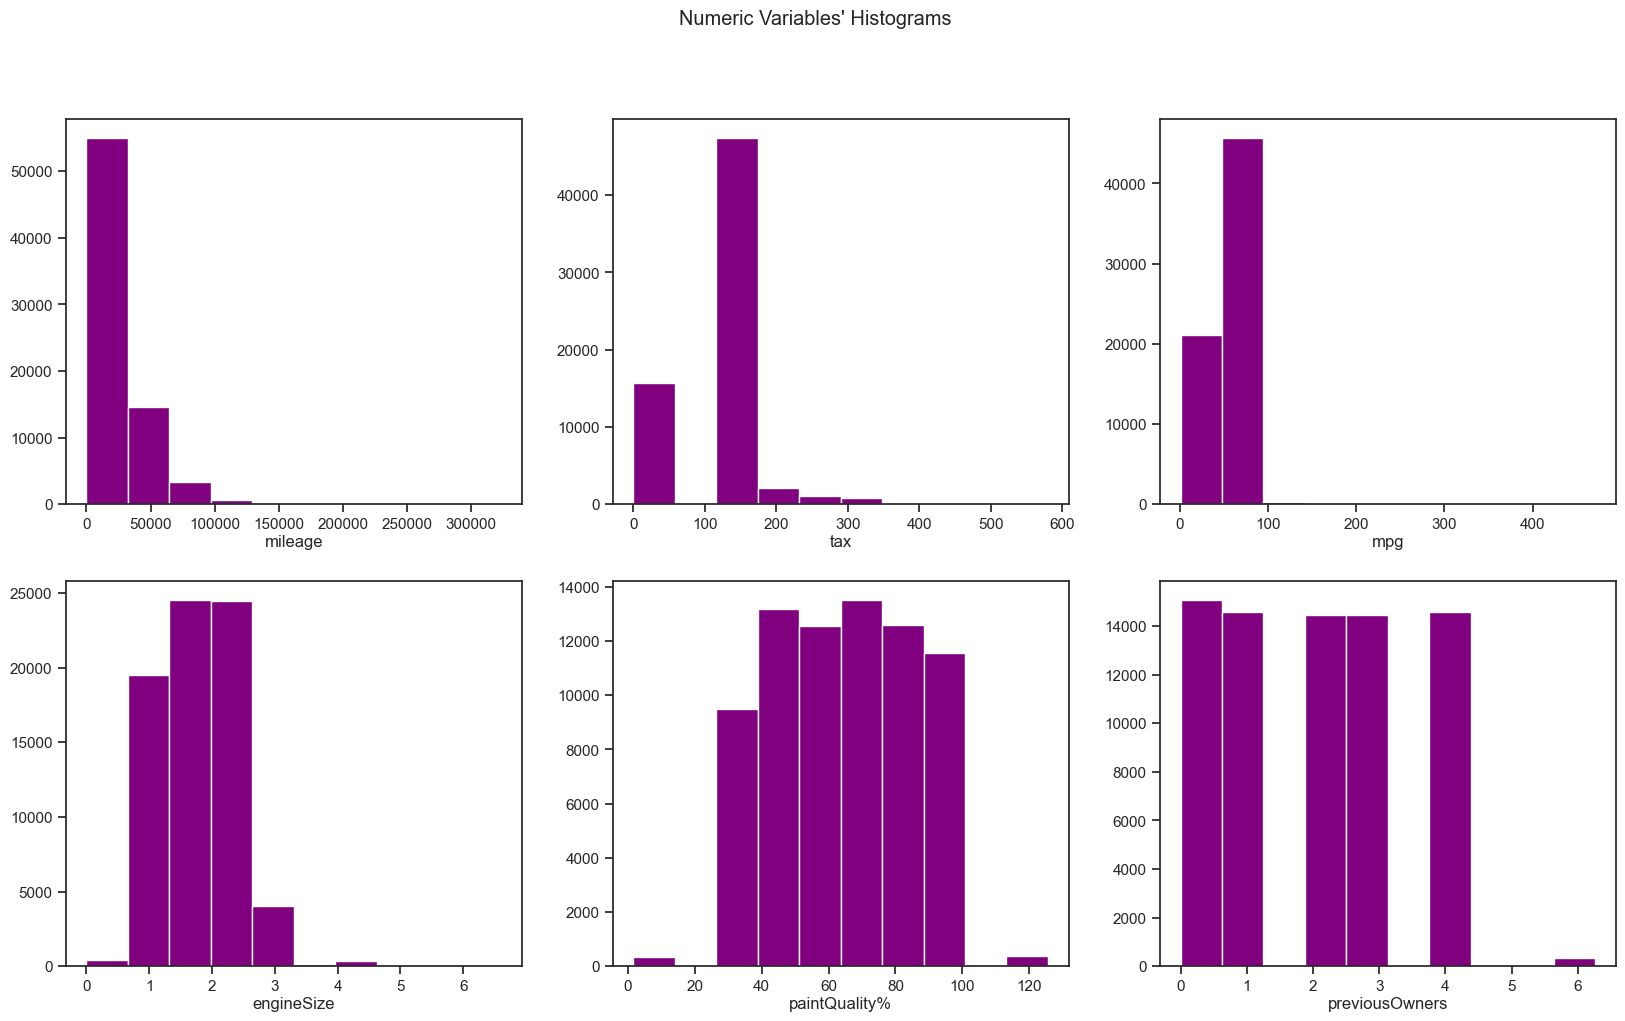

In [ ]:
sp_rows = 2
sp_cols = 3


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

### **Boxplot**

We can also plot the boxplot of all the numerical features.

Text(0.5, 0.98, 'BoxPlots')

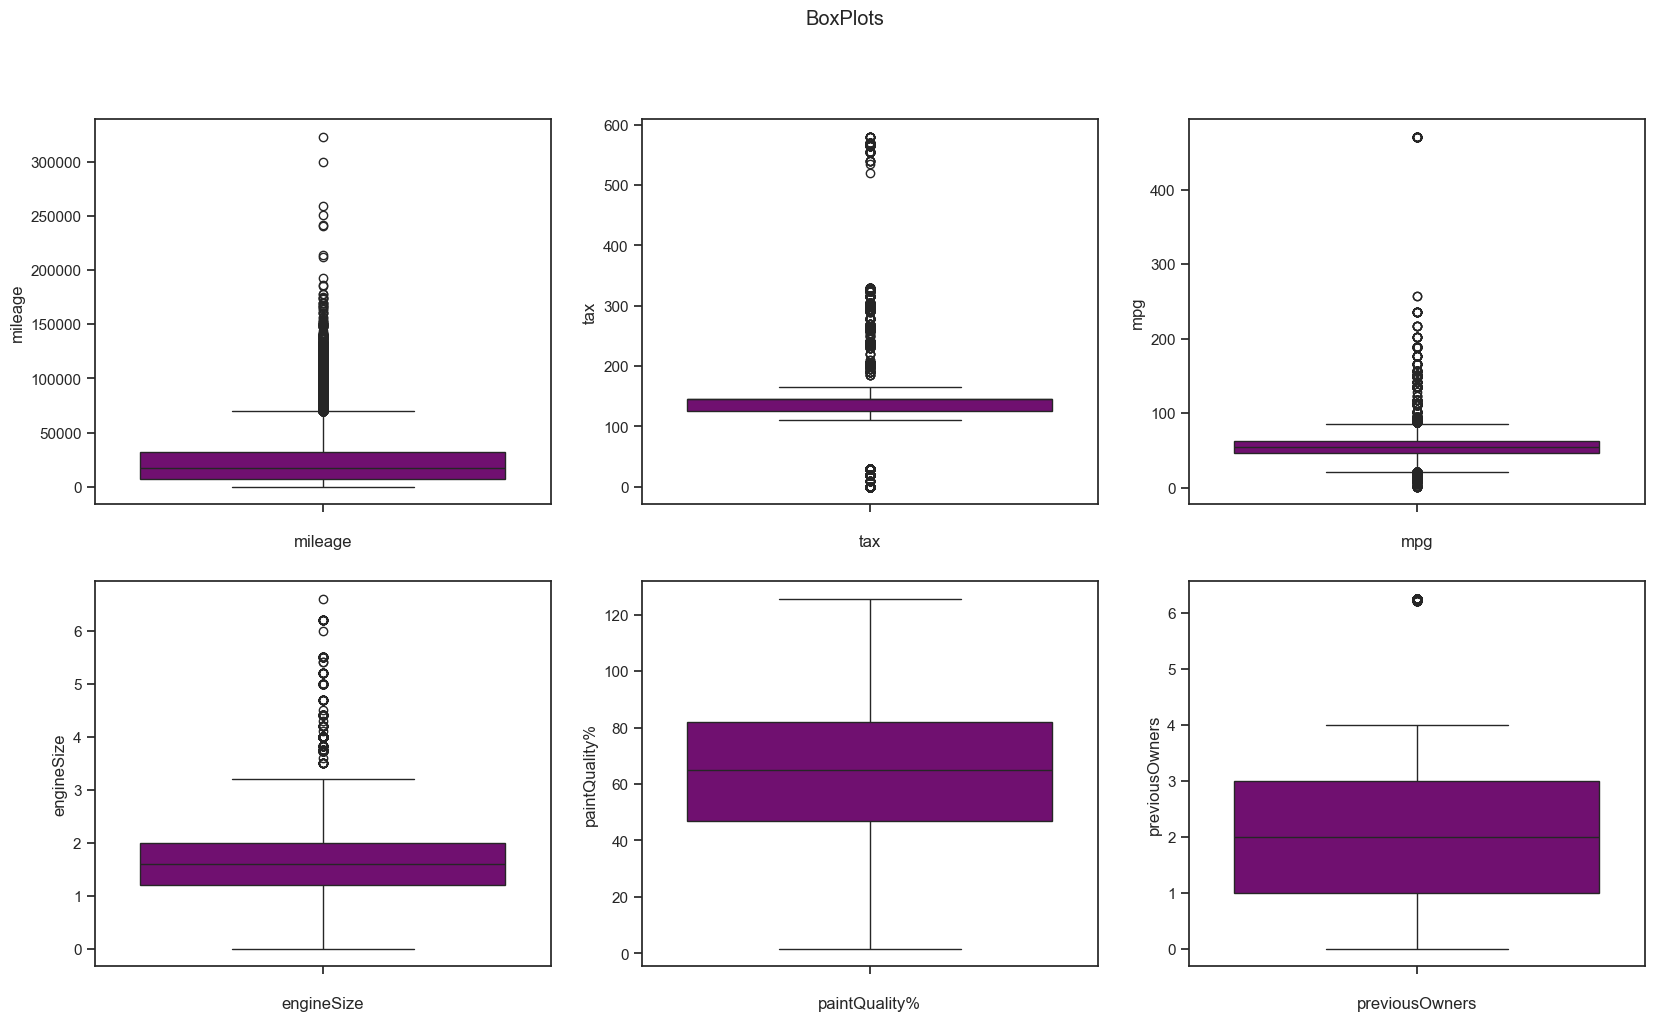

In [ ]:
#boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")

### **BarPlot**

For categorical features we will observe them via a Bar Plot.

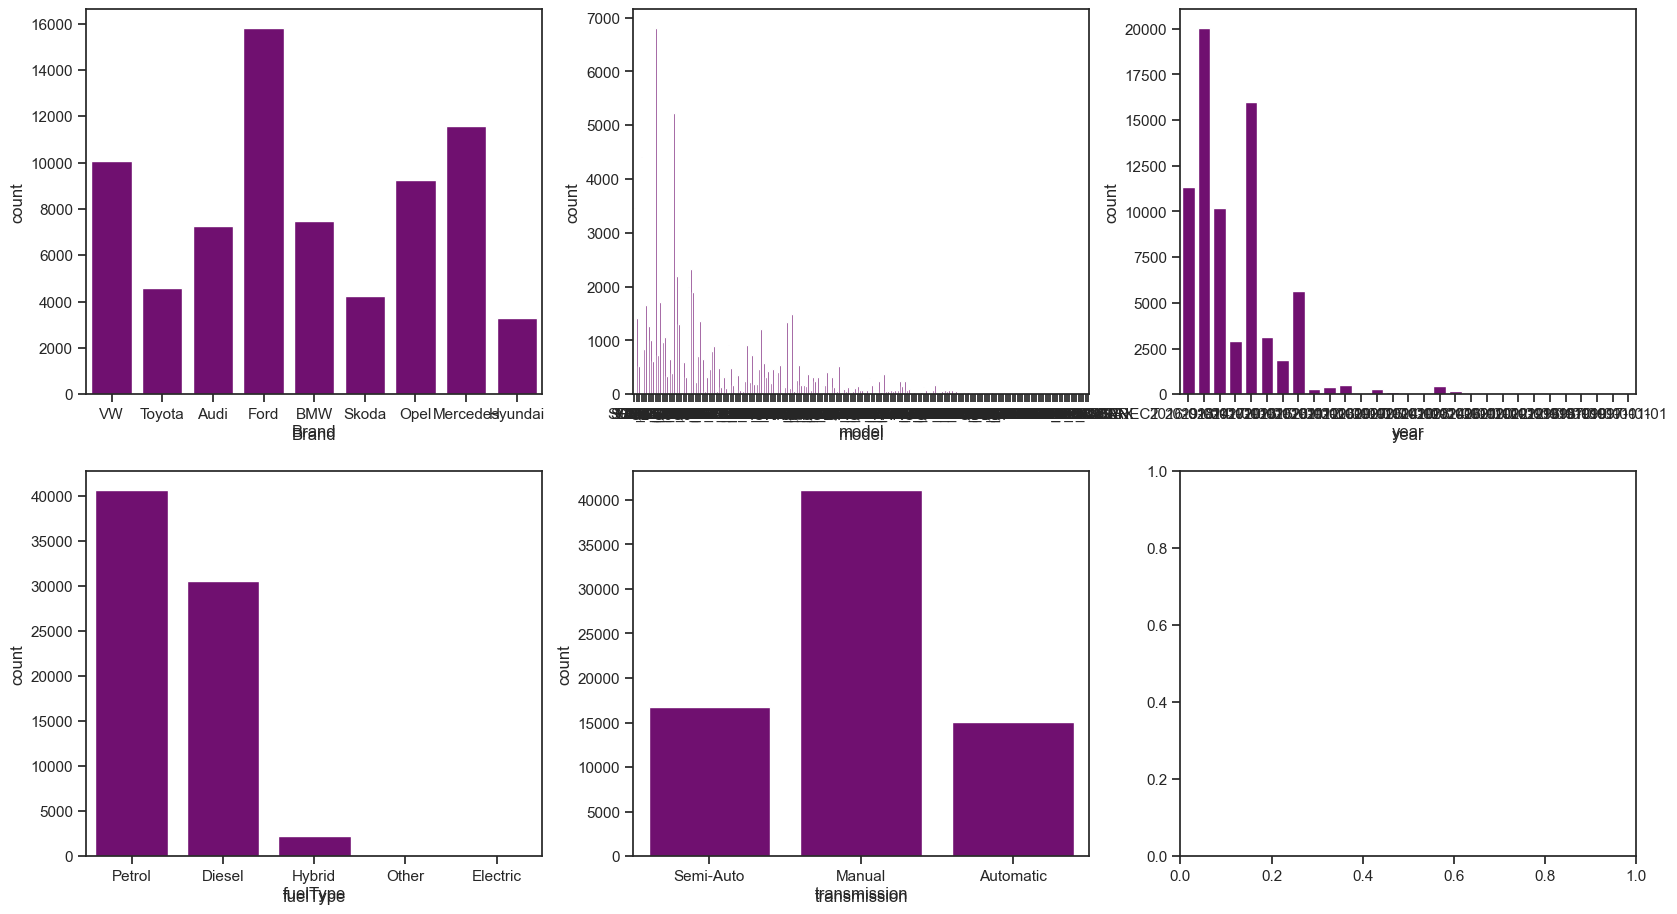

In [ ]:
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), cat_features): 
    sns.countplot(x=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13)

In [204]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

### **Outlier Analysis on Numerical Variables**

In [ ]:
for col in metric_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X[(dcustomer[col] < lower) | (X[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(dcustomer):.2%})")